# Проект "Титаник"

Мало найдется людей, которые не слышали про крушение атлантического лайнера **“Титаник”**. Самый большой на тот момент океанский лайнер столкнулся с айсбергом, что привело к гибели самого корабля и большинства находившихся на борту пассажиров: по различным данным, катастрофа унесла жизни от 1495 до 1635 человек из 2208 находившихся на борту. Крушение титаника глубоко отпечаталось в нашей культуре: этому событию посвящено множество литературных произведений (как документальных, так и художественных), десятки фильмов (самым известным из которых, пожалуй, является картина режиссера Джеймса Кэмерона). И даже первое соревнование на Kaggle **“Titanic: Machine Learning from Disaster”** (кстати, датасет мы позаимствовали отсюда) посвящено теме, которую мы избрали для проекта этой недели.

качество этого предсказания. Да, данные не самые веселые, но очень интересные. Проанализировав их и построив модель, можно прийти ко многим интересным социально-культурным выводам: что в начале 20-го века могло повлиять на то, выживет человек в катастрофе, или нет? Пол, возраст, социальный и экономический класс? Успешно решив проект (а в вас мы не сомневаемся), обязательно подумайте о важности тех или иных факторов.

И да, науки о данных применяются в совершенно разных сферах: не только технических и экономических, но также и в истории, культуре, социологии и многих других. Если вам это покажется интересным, обратите внимание на область исследований [Digital Humanities](https://en.wikipedia.org/wiki/Digital_humanities)

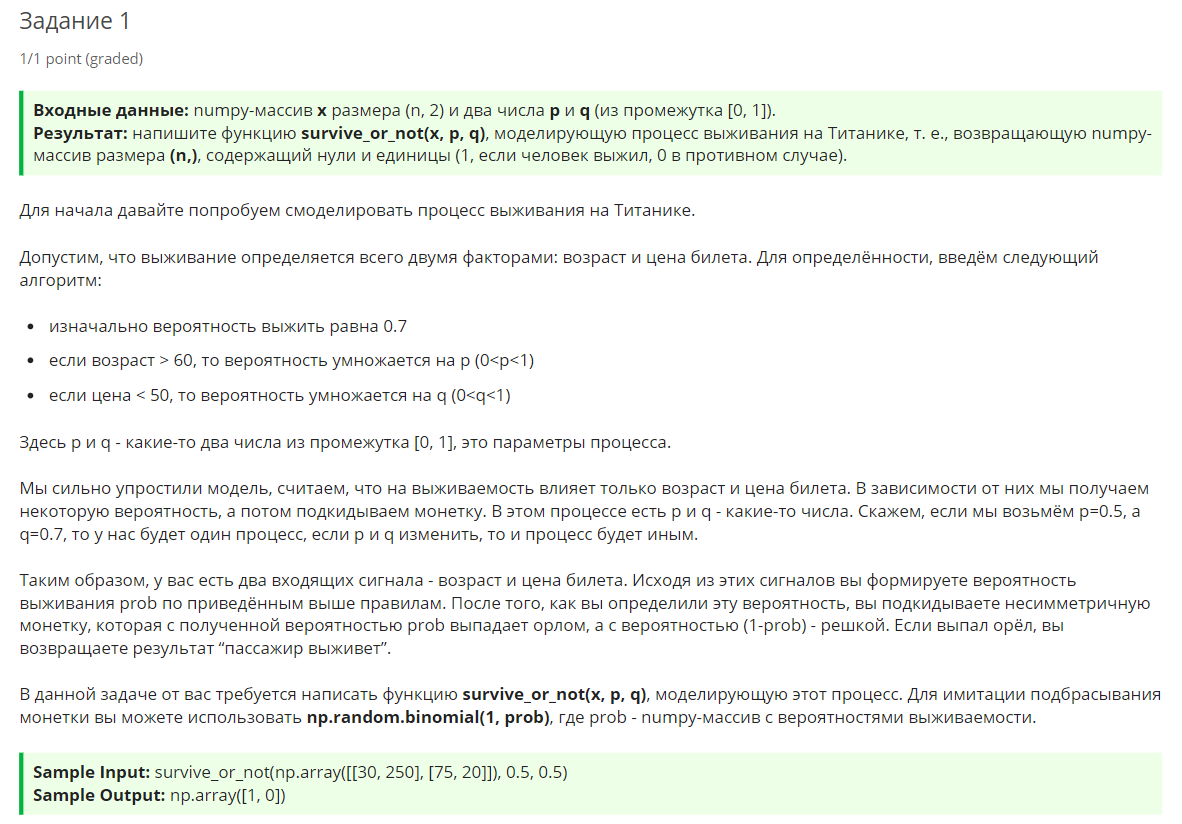

In [3]:
import numpy as np
#Решение из ответа
def survive_or_not(x, p, q):
    y = np.ones(x.shape[0]) * 0.7
    y[x[:,0] > 60] *= p
    y[x[:,1] < 50] *= q
    return np.random.binomial(1, y)

# Мое решение
def survive_or_not (x, p, q):
    import numpy as np
    import random
    a = []
    for i in range(x.shape[0]):
        proba = 0.7
        if x[i,0]>60:
            proba*=p
        if x[i,1]<50:
            proba*=q
        a.append(proba)
    return np.random.binomial(1, a)

survive_or_not(np.array([[30, 250], [75, 20]]), 0.5, 0.5)

array([1, 0])

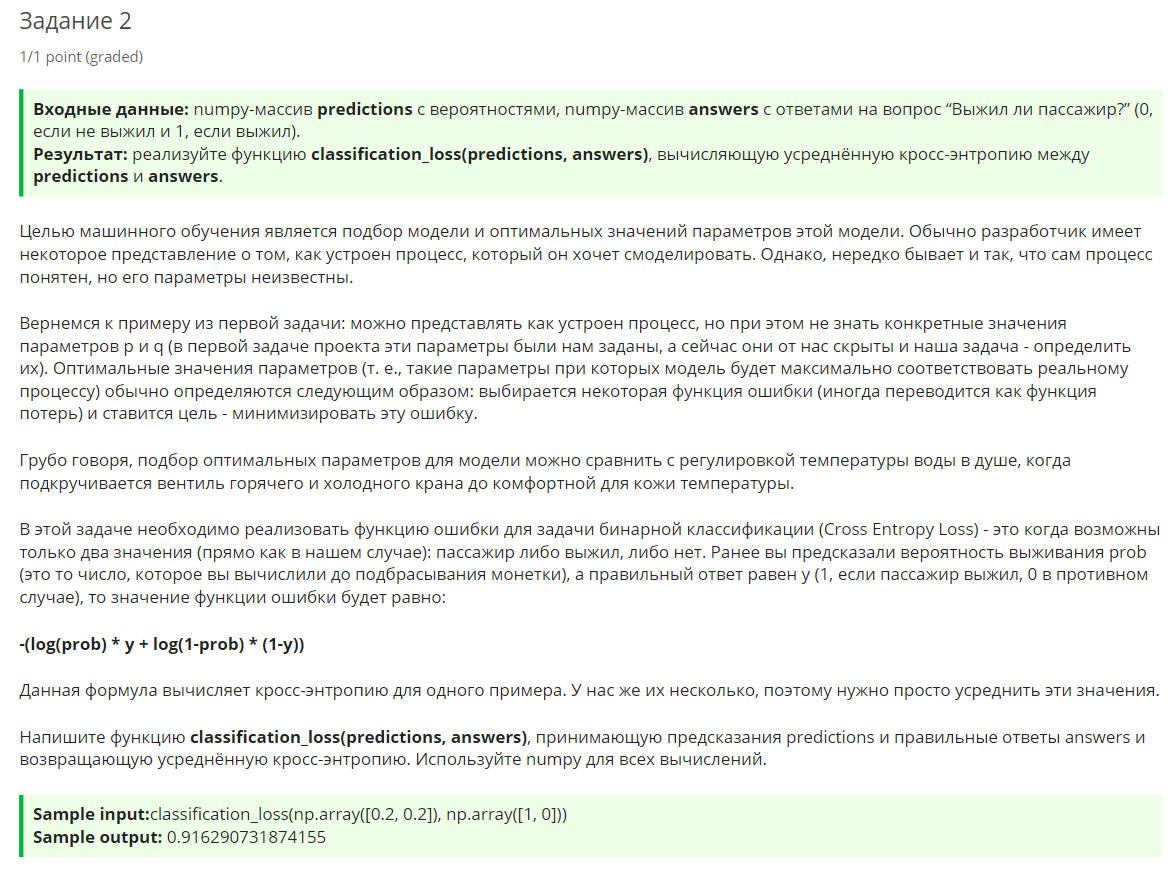

In [4]:
def classification_loss(predictions, answers):
    return np.mean(-(np.log(predictions) * answers + np.log(1-predictions) * (1-answers)))

classification_loss(np.array([0.2, 0.2]), np.array([1, 0]))

0.916290731874155

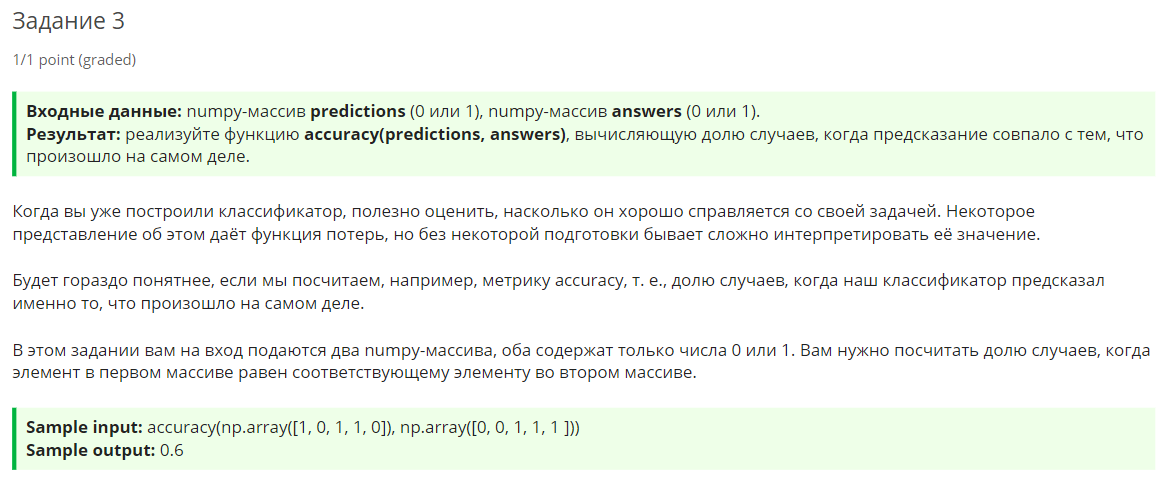

In [6]:
def accuracy(predictions, answers):
    import numpy as np
    return np.mean(predictions == answers)
accuracy(np.array([1, 0, 1, 1, 0]), np.array([0, 0, 1, 1, 1 ]))

0.6

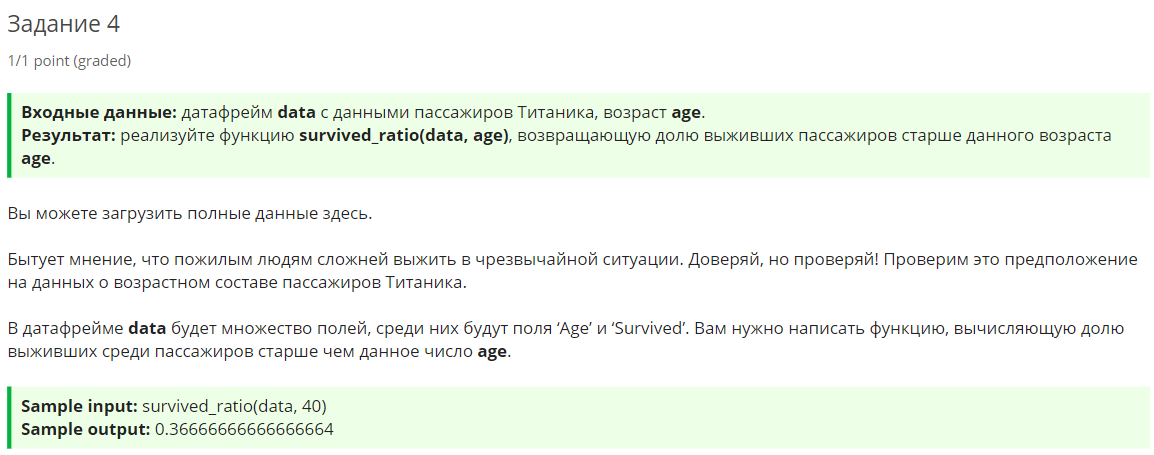

In [13]:
def survived_ratio(data, age):
    
    return data[(data['Age']>age)&(data['Survived']==1)].shape[0]/data[(data['Age']>age)&((data['Survived']==1)|(data['Survived']==0))].shape[0]
import pandas as pd
survived_ratio(pd.read_csv(r'C:\Users\snkna\Downloads\titanic.csv'), 40)

0.36666666666666664

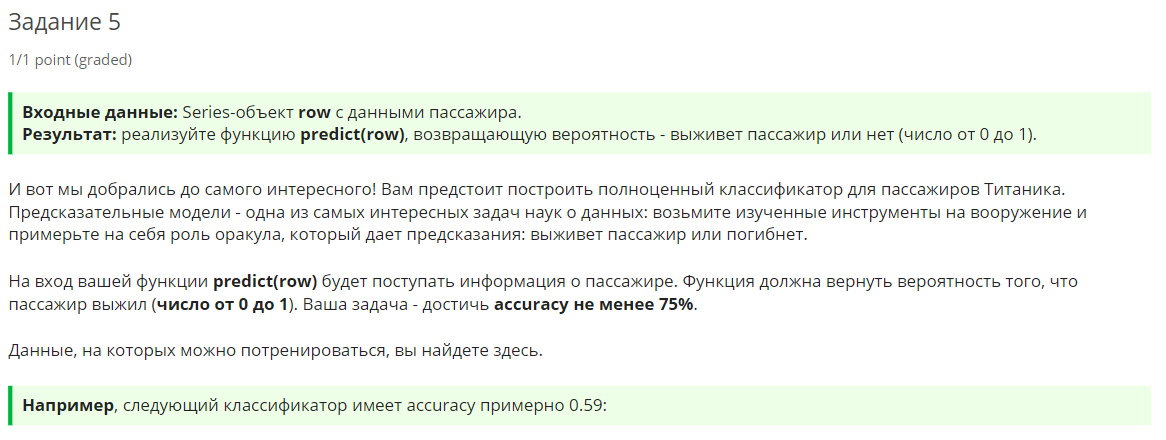

In [20]:
# Решение от автора:
def predict(row):
    if row['Sex'] == 'female':
        return 1
    else:
        return 0
    
# Мое решение
def predict(row):
    if row['Sex'] =='female':
       return 1
    if  row['SibSp'] >=3:
       return 0
    elif  (row['SibSp'] >=2 ) and row['Pclass'] ==3:
       return 0
    elif (row['SibSp']+row['Parch'])<1 or (row['SibSp']+row['Parch']) >3:
       return 0
    elif (row['Sex'] =='femail') and ((row['Pclass'] ==1) or (row['Pclass'] ==2)):
        return 1
    elif (row['Age']>60) and (row['Age']<75) :
       return 0
    elif (row['Age']<15) :
       return 1
    elif row['Sex'] =='male':
       return 0
    elif (row['Pclass'] ==1):
       return 1
    elif row['Fare'] >49:
       return 1
    else:
       return 0

predict(pd.read_csv(r'C:\Users\snkna\Downloads\titanic.csv').iloc[0])

0